# **Image Augmentation**

In [ ]:
# importing the important packages and libraries
from PIL import Image
import matplotlib.pyplot as plt
import random
import cv2
import os

In [ ]:
# unzip the file, and creating a new directory to store the unzipped content
!unzip '/content/SBILab-images.zip' -d '/content/SBILab_images'

Archive:  /content/SBILab-images.zip
   creating: /content/SBILab_images/SBILab-images/images/
  inflating: /content/SBILab_images/SBILab-images/images/108.bmp  
  inflating: /content/SBILab_images/SBILab-images/images/109.bmp  
  inflating: /content/SBILab_images/SBILab-images/images/112.bmp  
  inflating: /content/SBILab_images/SBILab-images/images/113.bmp  
  inflating: /content/SBILab_images/SBILab-images/images/201.bmp  
  inflating: /content/SBILab_images/SBILab-images/images/202.bmp  
  inflating: /content/SBILab_images/SBILab-images/images/203.bmp  
  inflating: /content/SBILab_images/SBILab-images/images/205.bmp  
  inflating: /content/SBILab_images/SBILab-images/images/207.bmp  
  inflating: /content/SBILab_images/SBILab-images/images/208.bmp  


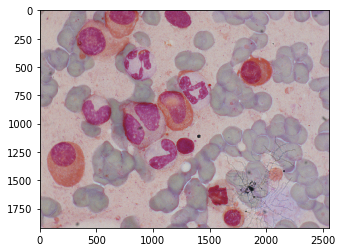

In [ ]:
# showing the sample image from the dataset
# image.mode   # should return the string 'RGB'/'BGR' (PIL object)
img = cv2.imread(r'/content/SBILab_images/SBILab-images/images/108.bmp')
plt.imshow(img, interpolation='nearest')
plt.show()

In [ ]:
# shape of the image. (a, b, c) -> a: number of rows, b: number of columns. c: color channel (here 3: (rgb))
img.shape

(1920, 2560, 3)

In [ ]:
# utility program to generate 3 random file names from the image directory
def generate_random_file_names(directory):
  file_names = []
  for i in range(3):
    random_file = random.choice(os.listdir(directory))
    file_names.append(random_file)

  return file_names

In [ ]:
def get_image_array(file_name):
  img = cv2.imread(r'/content/SBILab_images/SBILab-images/images/{}'.format(file_name))
  return img

# **Image Resizing**

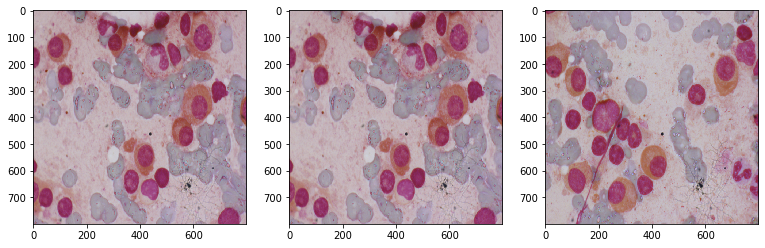

In [ ]:
plt.figure(figsize=(13, 13))

def resize_image(image):
  """
    takes an image ndarray, resize it with
    x width, y height, and return the resized ndarray.
  """
  x, y = 800, 800
  img = cv2.resize(image, (x, y))
  return img

file_names = generate_random_file_names("/content/SBILab_images/SBILab-images/images")
image_arr = []

# loop for getting image, resize it, and append the image array into image_arr list.
for i in range(len(file_names)):
  img_array = get_image_array(file_names[i])
  resized_image_array = resize_image(img_array)
  image_arr.append(resized_image_array)

# showing the image one by one
for i in range(len(image_arr)):
    plt.subplot(1, 3, i+1)
    plt.imshow(image_arr[i])
 
plt.show()

# **Image Padding**

**top**: border width in no. of pixels in top direction. \
**bottom**: border width in no. of pixels in bottom direction. \
**left**: border width in no. of pixels in left direction. \
**right**: border width in no. of pixels in right direction. 
**cv2.BORDER_CONSTANT**: It adds a constant colored border. The value should be given as a keyword argument. \
**value**: It is an optional parameter which depicts color of border.

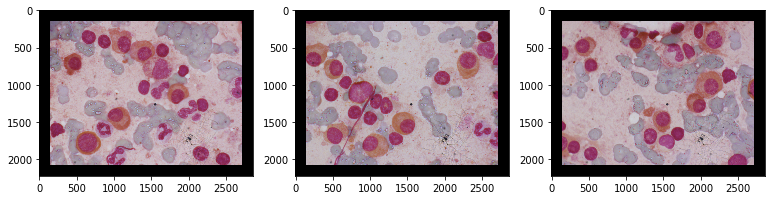

In [ ]:
plt.figure(figsize=(13, 13))

def pad_image(image):
  """ takes an image ndarray, pad it and return the padded ndarray. """
  top, bottom, left, right = 150, 150, 150, 150
  img = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, None, value= 0)
  return img

file_names = generate_random_file_names("/content/SBILab_images/SBILab-images/images")
image_arr = []

# loop for getting image, pad it, and append the image array into image_arr list.
for i in range(len(file_names)):
  img_array = get_image_array(file_names[i])
  padded_image_array = pad_image(img_array)
  image_arr.append(padded_image_array)

for i in range(len(image_arr)):
    plt.subplot(1, 3, i+1)
    plt.imshow(image_arr[i])
 
plt.show()

# **Image Crop**

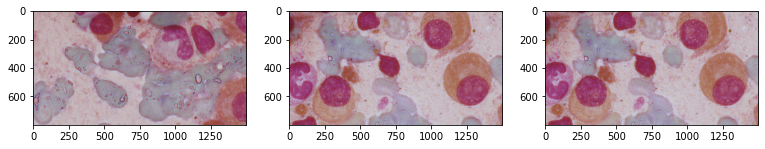

In [ ]:
plt.figure(figsize=(13, 13))

# crop the image ndarray
def crop_image(image):
  """ taking image portion from row 200 to 1000, and columns 500 to 2000 """
  img = image[200:1000, 500:2000]
  return img

file_names = generate_random_file_names("/content/SBILab_images/SBILab-images/images")
image_arr = []

for i in range(len(file_names)):
  img_array = get_image_array(file_names[i])
  crop_image_array = crop_image(img_array)
  image_arr.append(crop_image_array)

for i in range(len(image_arr)):
    plt.subplot(1, 3, i+1)
    plt.imshow(image_arr[i])
 
plt.show()

# **Gray Scale Image**

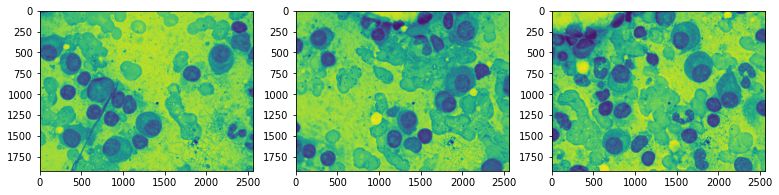

In [ ]:
plt.figure(figsize=(13, 13))

# convert image into grayscale
def convert_image_color(image):
  """ Formula used (weighted average): 0.299*R + 0.587*G + 0.114*B """
  img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  return img

file_names = generate_random_file_names("/content/SBILab_images/SBILab-images/images")
image_arr = []

for i in range(len(file_names)):
  img_array = get_image_array(file_names[i])
  grayscale_image_array = convert_image_color(img_array)
  image_arr.append(grayscale_image_array)

for i in range(len(image_arr)):
    plt.subplot(1, 3, i+1)
    plt.imshow(image_arr[i])
 
plt.show()

# **Image Contrast**
**Contrast** means to change the value of every image pixel. This change can be done by either multiplying or dividing the pixel values of the image, by any constant.\

## **g(i,j)=α⋅f(i,j)+β**
where f(i, j) -> source image pixels at ith-row and jth-column, and g(i, j) -> output image pixels. \
The parameters α and β are the gain and bias and sometimes these parameters controls the contrast and brightness respectively.
You can think of f(x) as the source image pixels and g(x) as the output image pixels.

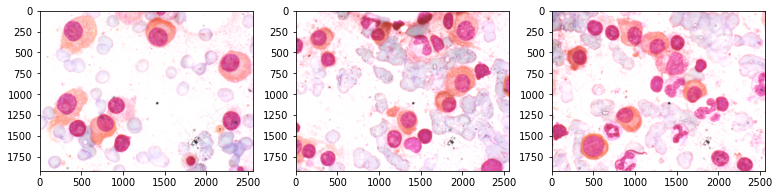

In [ ]:
plt.figure(figsize=(13, 13))

def change_image_contrast(image):
  alpha = 1.5                     # Contrast control (1.0-3.0)
  beta = 0                        # Brightness control (0-100)

  img = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
  return img

file_names = generate_random_file_names("/content/SBILab_images/SBILab-images/images")
image_arr = []

for i in range(len(file_names)):
  img_array = get_image_array(file_names[i])
  contrast_image_array = change_image_contrast(img_array)
  image_arr.append(contrast_image_array)

for i in range(len(image_arr)):
    plt.subplot(1, 3, i+1)
    plt.imshow(image_arr[i])
 
plt.show()

# **Image Saturation**

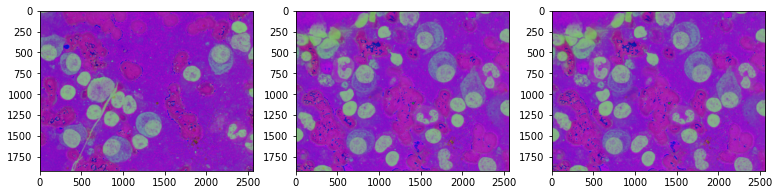

In [ ]:
plt.figure(figsize=(13, 13))

# convert RGB/BGR to HSV (hue saturation value) 0≤V≤1 , 0≤S≤1, 0≤H≤360
def change_image_saturation(image):
  img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  return img

file_names = generate_random_file_names("/content/SBILab_images/SBILab-images/images")
image_arr = []

for i in range(len(file_names)):
  img_array = get_image_array(file_names[i])
  saturation_image_array = change_image_saturation(img_array)
  image_arr.append(saturation_image_array)

for i in range(len(image_arr)):
    plt.subplot(1, 3, i+1)
    plt.imshow(image_arr[i])
 
plt.show()